# Real estate price

In [1]:
import pandas as pd
url = 'https://raw.githubusercontent.com/rashakil-ds/Public-Datasets/refs/heads/main/Real%20estate.csv'
df = pd.read_csv(url)

In [2]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
df = df.drop(['No','X5 latitude','X6 longitude'], axis=1)
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,2012.917,32.0,84.87882,10,37.9
1,2012.917,19.5,306.59470,9,42.2
2,2013.583,13.3,561.98450,5,47.3
3,2013.500,13.3,561.98450,5,54.8
4,2012.833,5.0,390.56840,5,43.1


In [4]:
df['X1 transaction date'] = df['X1 transaction date'].astype(str).str.extract(r'^(\d{4})')[0]
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,2012,32.0,84.87882,10,37.9
1,2012,19.5,306.59470,9,42.2
2,2013,13.3,561.98450,5,47.3
3,2013,13.3,561.98450,5,54.8
4,2012,5.0,390.56840,5,43.1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 5 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    object 
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   Y house price of unit area              414 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 16.3+ KB


In [6]:
df['X1 transaction date'] = df['X1 transaction date'].astype(int)
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,2012,32.0,84.87882,10,37.9
1,2012,19.5,306.59470,9,42.2
2,2013,13.3,561.98450,5,47.3
3,2013,13.3,561.98450,5,54.8
4,2012,5.0,390.56840,5,43.1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 5 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    int32  
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   Y house price of unit area              414 non-null    float64
dtypes: float64(3), int32(1), int64(1)
memory usage: 14.7 KB


### Dataset Explanation

1. **X1 transaction date** (`int32`):  
   - Represents the year of the transaction, indicating when the real estate sale occurred.  
   - Example: 2012 or 2013.

2. **X2 house age** (`float64`):  
   - The age of the house in years at the time of the transaction.  
   - Example: 32.0 means the house is 32 years old.

3. **X3 distance to the nearest MRT station** (`float64`):  
   - The distance from the house to the nearest MRT station, measured in meters.  
   - Example: 84.87882 meters.

4. **X4 number of convenience stores** (`int64`):  
   - The number of convenience stores within a certain vicinity of the house.  
   - Example: 10 means there are 10 convenience stores nearby.

5. **Y house price of unit area** (`float64`):  
   - The price per unit area (e.g., per square meter) of the house during the transaction.  
   - Example: 37.9 means 37.9 currency units per square meter.


# Continue....

### Steps for Regression Analysis

#### **1. Split the Dataset**
- Split the data into **training (70%)** and **testing (30%)** subsets.
- Use the `train_test_split` function to ensure randomness in the split.
- Define:
  - **Features (X)**: `X1 transaction date`, `X2 house age`, `X3 distance to the nearest MRT station`, `X4 number of convenience stores`.
  - **Target (Y)**: `Y house price of unit area`.

#### **2. Check Correlation**
- Compute the correlation matrix to understand the relationships between features and the target variable.
- Visualize the correlation matrix using a **heatmap**:
  - Strong correlations between features and the target suggest potential predictors.
  - Identify multicollinearity (strong correlations between features), which might affect regression models.

#### **3. Apply Regression Models**

**a. Linear Regression**
1. Train a **Linear Regression** model using the training data.
2. Predict the target values using the testing data.

**b. Polynomial Regression**
1. Use `PolynomialFeatures` to generate polynomial terms for the features (e.g., degree = 2 or 3).
2. Train a **Linear Regression** model on the transformed polynomial features.
3. Predict the target values using the transformed testing data.

#### **4. Evaluate Model Performance**
- Evaluate both Linear and Polynomial Regression models using:
  1. **Mean Squared Error (MSE)**:
     - Measures the average squared difference between predicted and actual values.
     - Lower MSE indicates better performance.
  2. **R-squared (R²)**:
     - Measures how well the model explains the variability of the target variable.
     - Higher R² indicates better performance.
- Compare the results to determine which model performs better.

#### **5. Visualize Results**
- Plot **actual vs. predicted values** for both Linear and Polynomial Regression.
- For Polynomial Regression, visualize the curve fitting to see how well it models the data.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

In [2]:
data = pd.read_csv("Real estate.csv")
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


#### 1. Split the Dataset

In [3]:
X = data[['X1 transaction date', 'X2 house age', 
          'X3 distance to the nearest MRT station', 
          'X4 number of convenience stores']]
y = data['Y house price of unit area']

#### Split the data into **training (70%)** and **testing (30%)** subsets

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


#### Check Corelation

In [6]:
corr_matrix = data.corr()
corr_matrix 

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,1.000000,-0.048658,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
X1 transaction date,-0.048658,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,-0.032808,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,-0.012699,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,-0.010110,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.011059,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.028587,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


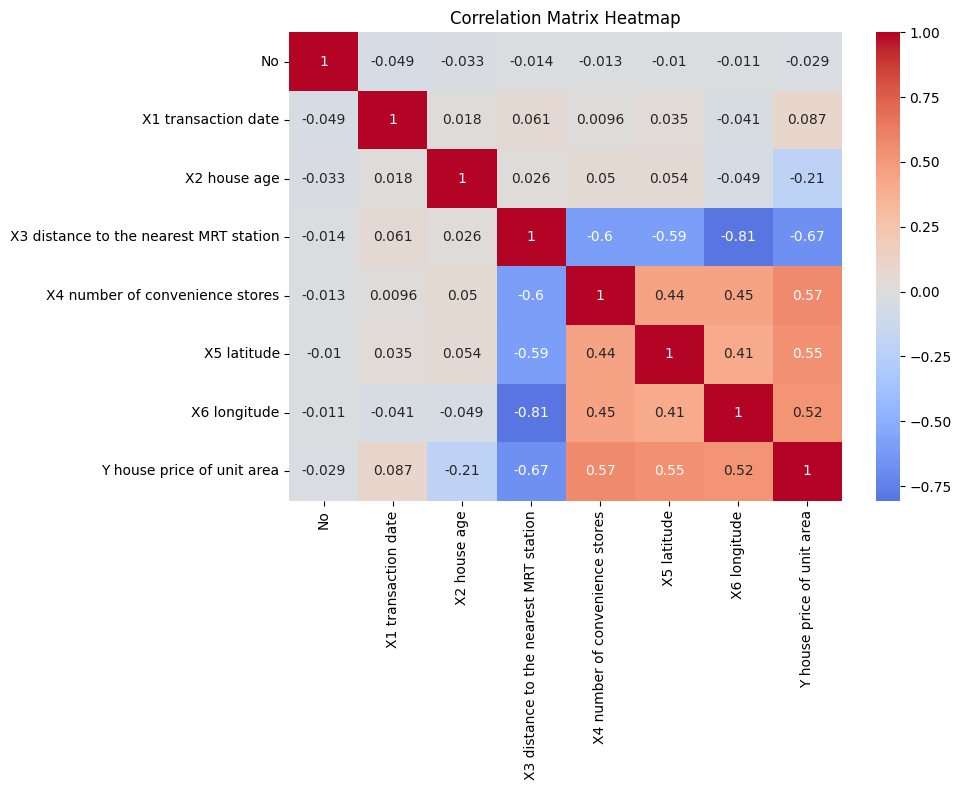

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

#### Applying Regression Model

In [9]:
# Linear regression
lin_reg = LinearRegression() 
lin_reg.fit(X_train, y_train)

LinearRegression()

In [10]:
#make predictions
y_predict = lin_reg.predict(X_test)

In [12]:
mse_lr = mean_squared_error(y_test, y_predict)
r2_lr = r2_score(y_test, y_predict)
print(mse_lr)
print(r2_lr)

74.68529290900015
0.5533847150236588


In [ ]:
print(lin_reg.score(X_test,y_test))
print(lin_reg.score(X_train,y_train))
# model is ok but not great

0.5533847150236588
0.5529449891711891


In [30]:
# polynomial (degree = 2)
poly2 = PolynomialFeatures(degree=2)
X_train_poly2 = poly2.fit_transform(X_train)
X_test_poly2 = poly2.transform(X_test)


In [31]:
pd.DataFrame(X_train_poly2).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.0,2013.417,20.3,287.60250,6.0,4.053848e+06,40872.3651,5.790638e+05,12080.502,412.09,5838.33075,121.8,8.271520e+04,1725.61500,36.0
1,1.0,2013.500,15.2,3771.89500,0.0,4.054182e+06,30605.2000,7.594711e+06,0.000,231.04,57332.80400,0.0,1.422719e+07,0.00000,0.0
2,1.0,2012.667,1.5,23.38284,7.0,4.050828e+06,3019.0005,4.706187e+04,14088.669,2.25,35.07426,10.5,5.467572e+02,163.67988,49.0
3,1.0,2012.833,13.9,4573.77900,0.0,4.051497e+06,27978.3787,9.206253e+06,0.000,193.21,63575.52810,0.0,2.091945e+07,0.00000,0.0
4,1.0,2012.833,15.0,1828.31900,2.0,4.051497e+06,30192.4950,3.680101e+06,4025.666,225.00,27424.78500,30.0,3.342750e+06,3656.63800,4.0


In [32]:
# Train the model
poly_reg2 = LinearRegression()
poly_reg2.fit(X_train_poly2, y_train)

LinearRegression()

In [33]:
# prediction make
y_pred_poly2 = poly_reg2.predict(X_test_poly2)

# Evaluate performance
mse_poly2 = mean_squared_error(y_test, y_pred_poly2)
r2_poly2 = r2_score(y_test, y_pred_poly2)

print(mse_poly2)
print(r2_poly2)

60.669986762922306
0.6371957265984278


In [37]:
print(poly_reg2.score(X_test_poly2,y_test))
print(poly_reg2.score(X_train_poly2,y_train))

0.6371957265984278
0.6384079244254759


In [ ]:
# polynomial (degree = 3)
poly3 = PolynomialFeatures(degree=3)
X_train_poly3 = poly3.fit_transform(X_train)
X_test_poly3 = poly3.transform(X_test)

In [34]:
# Train the model
poly_reg3 = LinearRegression()
poly_reg3.fit(X_train_poly3, y_train)

LinearRegression()

In [35]:
# prediction make
y_pred_poly3 = poly_reg3.predict(X_test_poly3)

# Evaluate performance
mse_poly3 = mean_squared_error(y_test, y_pred_poly3)
r2_poly3 = r2_score(y_test, y_pred_poly3)

print(mse_poly3)
print(r2_poly3)

61.06912075820017
0.6348089200920656


In [39]:
print(poly_reg3.score(X_test_poly3,y_test))
print(poly_reg3.score(X_train_poly3,y_train))

0.6348089200920656
0.6656494671842645


### Regularization

In [40]:
poly_ridge2 = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('ridge', Ridge(alpha=1.0))
])

In [43]:
poly_ridge2.fit(X_train, y_train)
y_pred_poly_ridge2 = poly_ridge2.predict(X_test)

c:\Users\Emon\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=7.23628e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [44]:
mse_poly_ridge2 = mean_squared_error(y_test, y_pred_poly_ridge2)
r2_poly_ridge2 = r2_score(y_test, y_pred_poly_ridge2)

print(mse_poly_ridge2)
print(r2_poly_ridge2)

61.124547656093554
0.6344774692958804


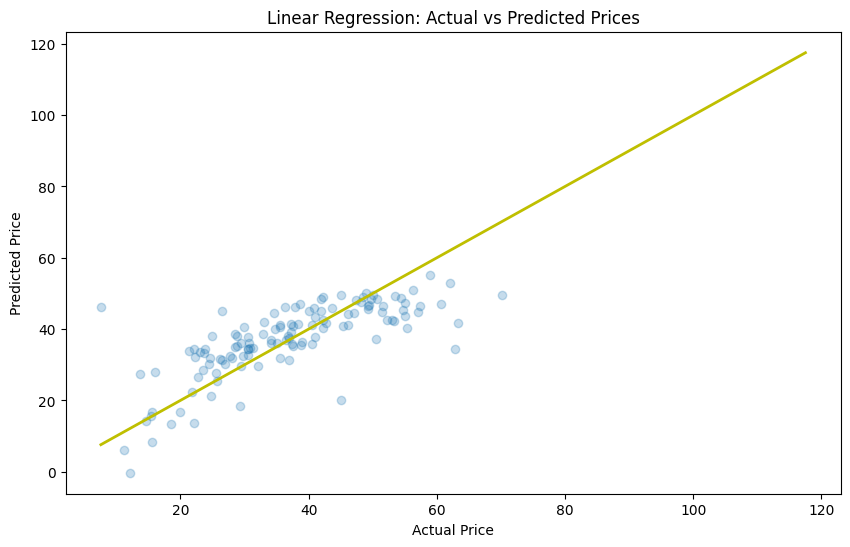

In [54]:
# Actual vs Predicted for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_predict, alpha=.25)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'y', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Linear Regression: Actual vs Predicted Prices')
plt.show()

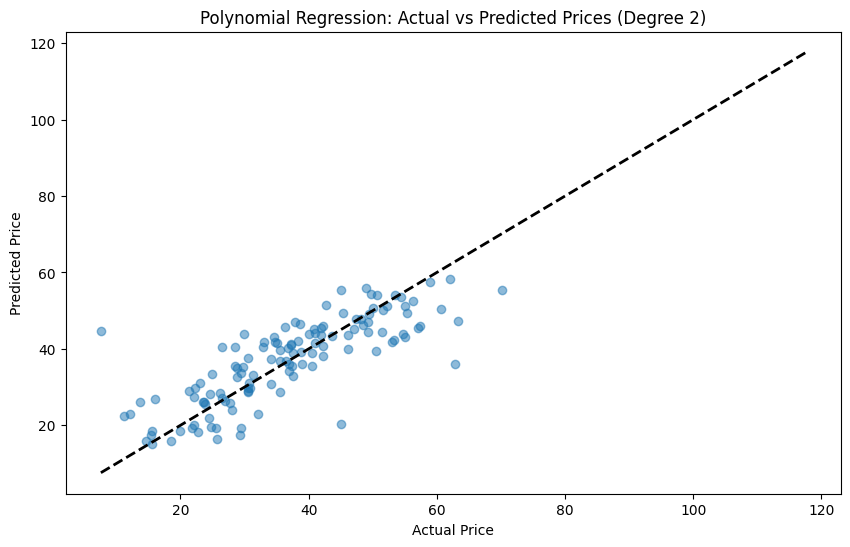

In [58]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_poly_ridge2, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Polynomial Regression: Actual vs Predicted Prices (Degree 2)')
plt.show()

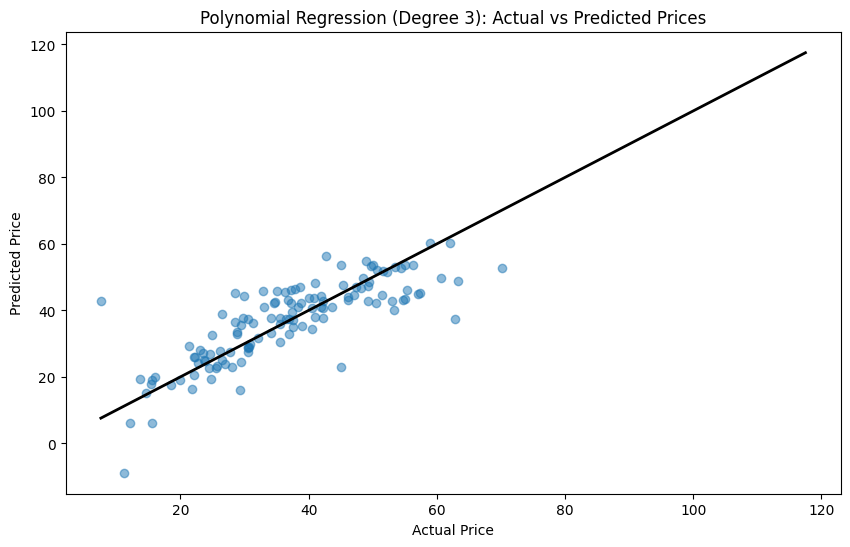

In [59]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_poly3, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Polynomial Regression (Degree 3): Actual vs Predicted Prices')
plt.show()